In [151]:
#Import Libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [152]:
df=pd.read_csv('default_2k.csv')

In [146]:
df.head()

,default,student,balance,income
0,No,No,412.071615,48347.296982
1,No,Yes,579.721305,18555.752586
2,No,No,694.398583,36570.425441
3,No,No,0.000000,41933.095770
4,No,Yes,407.340440,25376.728632


In [147]:
df.count()

default    1994
student    1994
balance    1994
income     1994
dtype: int64

In [148]:
df.default.value_counts()

No     1931
Yes      63
Name: default, dtype: int64

In [155]:
df_meta=pd.read_csv('Attribute.txt')
df_meta.head()

,Credit Card Default Data
0,Description
1,A simulated data set containing information on...
2,Default
3,default
4,A factor with levels No and Yes indicating whe...


In [156]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  1994 non-null   object 
 1   student  1994 non-null   object 
 2   balance  1994 non-null   float64
 3   income   1994 non-null   float64
dtypes: float64(2), object(2)
memory usage: 62.4+ KB


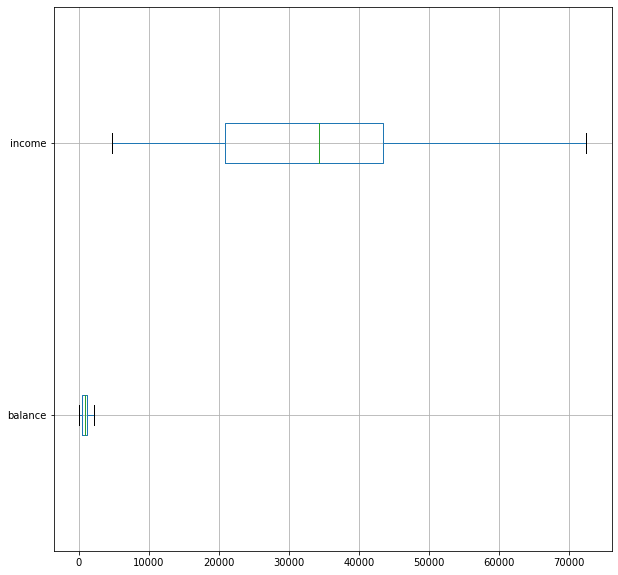

In [157]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

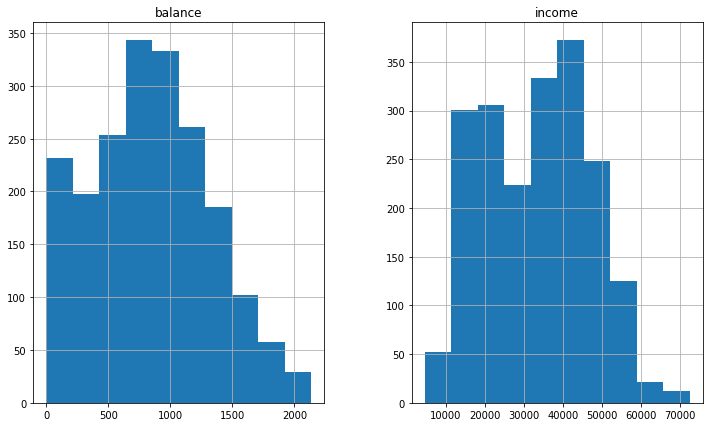

In [158]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_filtered=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

cols=df.dtypes[df.dtypes!='object'].index #taking only numerical attributes
fig = plt.figure(figsize = (12,7)) #figure size
ax = fig.gca() #this function adds as many as subplots as required depending upon number of columns
df_filtered[cols].hist(ax=ax) #histogram for numerical columns where axis ax is passed 
plt.show()

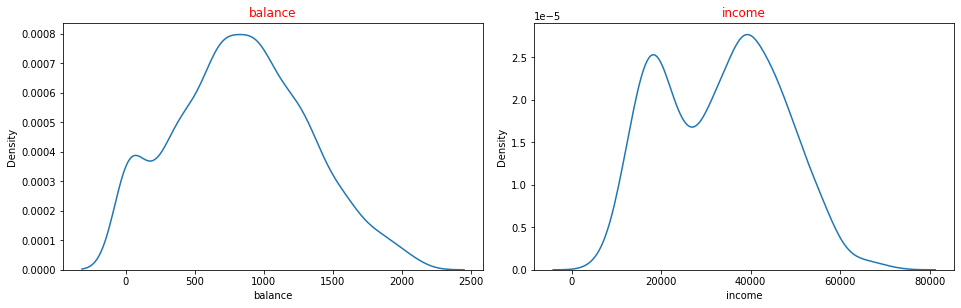

In [159]:
cols=df_filtered.dtypes[df_filtered.dtypes!='object'].index
data_plot=df_filtered[cols]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(5,3,i+1)
    sns.distplot(data_plot[data_plot.columns[i]], hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  1994 non-null   object 
 1   student  1994 non-null   object 
 2   balance  1994 non-null   float64
 3   income   1994 non-null   float64
dtypes: float64(2), object(2)
memory usage: 62.4+ KB


In [161]:
df['student']= pd.get_dummies(df['student'],drop_first=True)
df['default']= pd.get_dummies(df['default'],drop_first=True)
df.head()

,default,student,balance,income
0,0,0,412.071615,48347.296982
1,0,1,579.721305,18555.752586
2,0,0,694.398583,36570.425441
3,0,0,0.000000,41933.095770
4,0,1,407.340440,25376.728632


In [164]:
x = df.drop(columns=['default'])
y = df['default']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: uint8

In [163]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [103]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9749582637729549
[[582   0]
 [ 15   2]]


# Naive Bayes

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
model_score = model.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9816360601001669
[[579   3]
 [  8   9]]


# Decision Tree

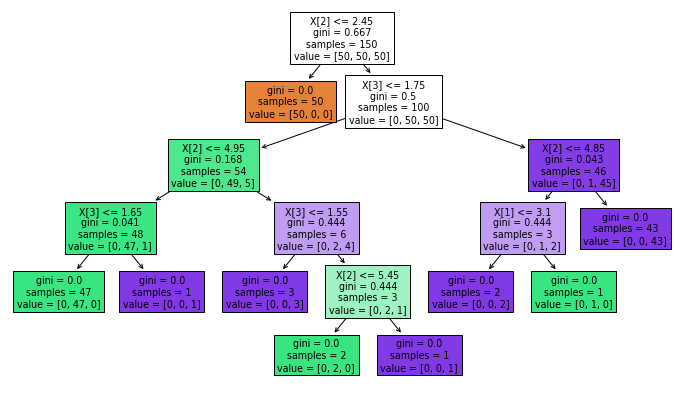

In [106]:
#Visualising Dtree in Python
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris=load_iris()
plt.figure(figsize=(12,7))
tree.plot_tree(clf.fit(iris.data, iris.target),filled=True) 
plt.show()

In [107]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [108]:
y_predict = clf.predict(x_test)
model_score = clf.score(x_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9599332220367279
[[566  16]
 [  8   9]]


# Ensemble: Random Forest

In [109]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clfRF=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF.fit(x_train,y_train)

y_pred=clfRF.predict(x_test)
model_scoreRF = clfRF.score(x_test, y_test)

In [110]:
print(model_scoreRF)
print(metrics.confusion_matrix(y_test, y_pred))

0.9766277128547579
[[576   6]
 [  8   9]]


# Bagging Classifier

In [111]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(random_state=1) #BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

In [112]:
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.9766277128547579
[[576   6]
 [  8   9]]


# Linear Discriminant Analysis

In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(x_train, y_train)
y_pred=clfLDA.predict(x_test)
model_scoreLDA = clfLDA.score(x_test, y_test)
print(model_scoreLDA)
print(metrics.confusion_matrix(y_test, y_pred))

0.9766277128547579
[[580   2]
 [ 12   5]]


# Ensemble: Boosting

In [114]:
from sklearn.ensemble import AdaBoostClassifier

clfADB = AdaBoostClassifier(n_estimators=100)
clfADB.fit(x_train,y_train)
y_pred=clfADB.predict(x_test)
model_scoreADB = clfADB.score(x_test, y_test)
print(model_scoreADB)
print(metrics.confusion_matrix(y_test, y_pred))

0.9766277128547579
[[576   6]
 [  8   9]]


# Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [116]:
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.9766277128547579
[[574   8]
 [  6  11]]


# K-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train) #scaling the data since KNN is a distance based algorithm.
x_test_scaled=ss.transform(x_test)
clfKNN=KNeighborsClassifier()
clfKNN.fit(x_train_scaled,y_train)
y_pred=clfKNN.predict(x_test_scaled)
model_scoreKNN = clfKNN.score(x_test_scaled, y_test)
print(model_scoreKNN)
print(metrics.confusion_matrix(y_test, y_pred))

0.9415692821368948
[[386  16]
 [ 19 178]]


# Cross-validation

In [40]:
from sklearn.model_selection import cross_val_score
clfCVRF = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clfCVRF, x_train, y_train, cv=10)
np.mean(scores)

0.9247070914696813

# Support Vector Machine 

In [41]:
from sklearn import svm

clfSVM = svm.SVC()
clfSVM.fit(x_train, y_train)
y_pred=clfSVM.predict(x_test)
model_scoreSVM = clfSVM.score(x_test, y_test)
print(model_scoreSVM)
print(metrics.confusion_matrix(y_test, y_pred))

0.9532554257095158
[[386  16]
 [ 12 185]]


# Xtreme Gradient Boosting 

In [42]:
import xgboost as xgb
clfXGB=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
clfXGB.fit(x_train, y_train)
y_pred=clfXGB.predict(x_test)
model_scoreXGB=clfXGB.score(x_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))

ModuleNotFoundError: No module named 'xgboost'

# Smote

In [165]:
from numpy import where
import pandas as pd

import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [166]:
oversample = SMOTE()
X, y = oversample.fit_resample(x, y)

In [167]:
counter=Counter(y)
counter

Counter({0: 1931, 1: 1931})

In [168]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [169]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)


0.91458153580673


<AxesSubplot:>

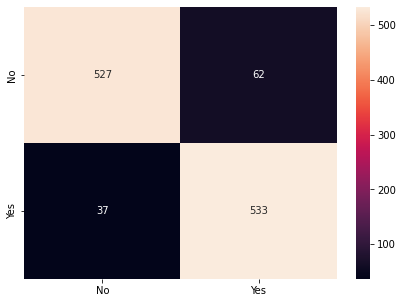

In [170]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [126]:
X.count()

student    3862
balance    3862
income     3862
dtype: int64

In [127]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)


NameError: name 'X_train' is not defined